## 03-04 Other Layer

In [18]:
%matplotlib inline
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image

### 1.对数据进行处理

加载图片，并转换为Tensor

In [9]:
image_path = Path('./image/lena.png')
image_data = Image.open(image_path).convert('RGB')  # 0-255

image_transform = transforms.Compose([transforms.ToTensor()])
image_tensor = image_transform(image_data)
image_tensor.unsqueeze_(dim=0)  # C*H*W -> B*C*H*W
image_tensor.shape

torch.Size([1, 3, 512, 512])

### 2.定义帮助函数

定义卷积操作函数

In [10]:
def make_conv(conv_layer, image_tensor):
    nn.init.xavier_normal_(conv_layer.weight.data)
    image_conv = conv_layer(image_tensor)
    return image_conv

定义还原图片操作，将Tensor转换为Image

In [11]:
def inverse_transform(img_tensor):
    # C*H*W -> H*W*C
    img_tensor = img_tensor.transpose(0, 2).transpose(0, 1)
    # 将tensor转换为0-255的ndarray
    img_array = np.array(img_tensor.detach()) * 255

    # 对3通道和单通道不同处理
    if img_array.shape[2] == 3:
        return Image.fromarray(img_array.astype('uint8')).convert('RGB')age_tensor
    else:
        return Image.fromarray(img_array.astype('uint8').squeeze())

### 3.测试各种其他层的操作

进行最大池化操作

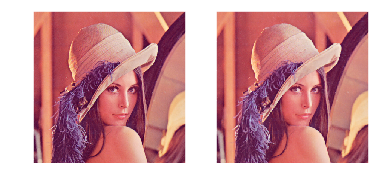

In [12]:
image_pool = nn.MaxPool2d((2, 2), stride=(2, 2))(image_tensor)
inverse_raw = inverse_transform(image_tensor.squeeze())
inverse_pool = inverse_transform(image_pool.squeeze())
plt.subplot(121).imshow(inverse_raw)
plt.subplot(122).imshow(inverse_pool)
plt.show()

进行平均池化操作

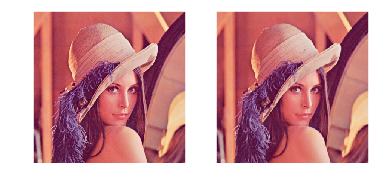

In [13]:
image_pool = nn.AvgPool2d((2, 2), stride=(2, 2))(image_tensor)
inverse_raw = inverse_transform(image_tensor.squeeze())
inverse_pool = inverse_transform(image_pool.squeeze())
plt.subplot(121).imshow(inverse_raw)
plt.subplot(122).imshow(inverse_pool)
plt.show()

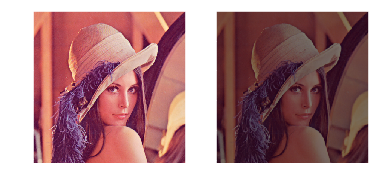

In [16]:
image_pool = nn.AvgPool2d((2, 2), stride=(2, 2), divisor_override=8)(image_tensor)
inverse_raw = inverse_transform(image_tensor.squeeze())
inverse_pool = inverse_transform(image_pool.squeeze())
plt.subplot(121).imshow(inverse_raw)
plt.subplot(122).imshow(inverse_pool)
plt.show()

进行最大值反池化操作

In [25]:
# 池化
image_tensor = torch.randint(high=5, size=(1, 1, 4, 4), dtype=torch.float)
pool_layer = nn.MaxPool2d((2, 2), stride=(2, 2), return_indices=True)
image_pool, indices = pool_layer(image_tensor)

# 反池化
image_reconstruct = torch.rand_like(image_pool, dtype=torch.float)
unpool_layer = nn.MaxUnpool2d((2, 2), stride=(2, 2))
image_unpool = unpool_layer(image_reconstruct, indices)

print('Raw Image:', image_tensor)
print('Pool Image:', image_pool)

print('Reconstruct Image:', image_reconstruct)
print('Unpool Image:', image_unpool)

Raw Image: tensor([[[[3., 0., 1., 1.],
          [3., 4., 2., 4.],
          [1., 2., 4., 4.],
          [1., 0., 2., 0.]]]])
Pool Image: tensor([[[[4., 4.],
          [2., 4.]]]])
Reconstruct Image: tensor([[[[0.3124, 0.8234],
          [0.0214, 0.4539]]]])
Unpool Image: tensor([[[[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.3124, 0.0000, 0.8234],
          [0.0000, 0.0214, 0.4539, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000]]]])


进行线性变换操作

In [33]:
input_tensor = torch.tensor([[1, 2, 3]], dtype=torch.float)
linear_layer = nn.Linear(3, 4)
linear_layer.weight.data = torch.tensor([
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 3],
    [4, 4, 4]
], dtype=torch.float)
linear_layer.bias.data.fill_(0.5)
output_tensor= linear_layer(input_tensor)
print(input_tensor.shape)
print(output_tensor.shape)
print(output_tensor)

torch.Size([1, 3])
torch.Size([1, 4])
tensor([[ 6.5000, 12.5000, 18.5000, 24.5000]], grad_fn=<AddmmBackward>)
